# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [63]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [64]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

* The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
* There is some data int he rating column that is not provided, as we will likley do some analysis on the rating against other data points, we will need to consider how to manage the missing rating information on some orders.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [65]:
# Print out the shape of the data to show rows and columns.
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:


* The data set is not that large so as we consider analysis of the dataset, time and complexity will likley not be major consideration.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [66]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


* Data for columns is a mixture of integer 64 bit (integer numbers), Object (string or mixed numeric/non-numeric) and float64 (floating point)
* The rating field being an object might be an issue as we start to analyze the data, we will come back to this later.
* All other data columns look to be the right format, we will need to evaluate missung data next.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [67]:
#check to see if we have null data in any parts of the data frame.
df.isna().sum()


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [68]:
#Check to see why rating column has object data type
df['rating'].unique()


array(['Not given', '5', '3', '4'], dtype=object)

In [69]:
# replacing values with nan
df['rating'] = df['rating'].replace(['Not given'],np.nan)


In [70]:
#converting the data type to a float
df['rating']=df['rating'].astype(float)


In [71]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})


,Count,Percentage
rating,736,38.777661


In [72]:
#Checking for any duplicated data in the dataset.
df.duplicated().sum()

0

#### Observations:
* I found that there was data entered for rating as "Not Given". I converted to NaN and now we have null data in rating but this is okay. We could impute later to the mean of rating if we wanted but we will not do that in this case.
* I found no duplicated data across the data set
* It was important to convert the rating column to float as we will want to plot and evaluate this with other data and numeric data will allow us to do this.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [73]:
# Write your code here
df['food_preparation_time'].describe().T

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
* The average (mean) time to prep food is 27.37 minutes.
* The minimum (min) time to prep food is 20 minutes.
* The maximum time (max) to prep food is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [74]:
# SHows values that are null
df['rating'].isnull().sum()


736

#### Observations:
* We found that 736 orders were missing a corresponding rating, we evaluated this by looking at the null values as we have already converted the "Not Given" values.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

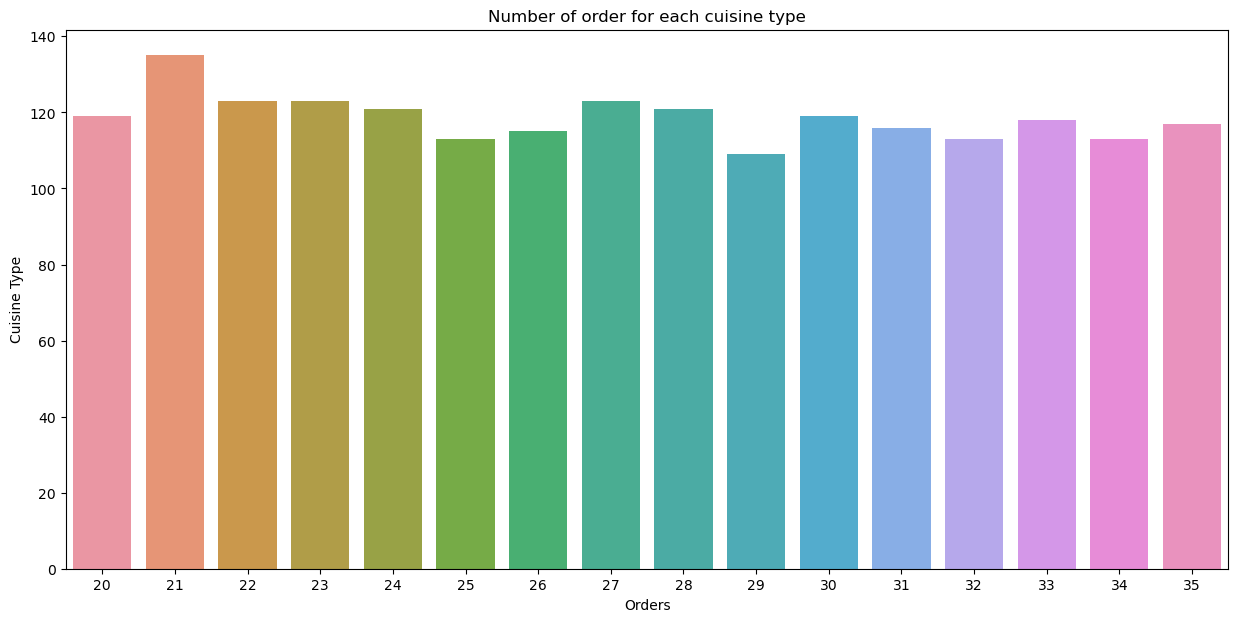

In [75]:
#Set the plot size
plt.figure(figsize=(15, 7))

# Create seaborn countplot and provide count of orders by cuisine type across all orders
cp_cuisine = sns.countplot(data=df, x='food_preparation_time')
#specify axis labels
cp_cuisine.set(ylabel='Cuisine Type',
       xlabel='Orders',
       title='Number of order for each cuisine type')

plt.show()


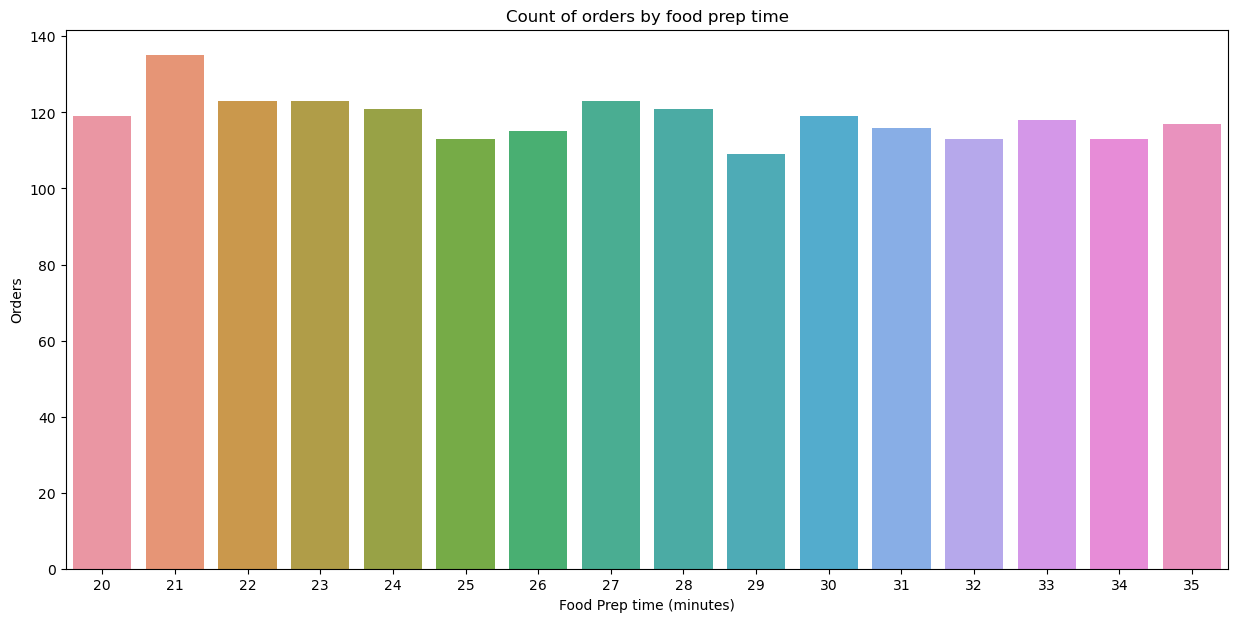

In [76]:
#Set plot size
plt.figure(figsize=(15, 7))

# Create seaborn countplot and provide count of the food preparation time across all orders
cp_orders = sns.countplot(data=df, x='food_preparation_time')
#specify axis labels
cp_orders.set(ylabel='Orders',
       xlabel='Food Prep time (minutes)',
       title='Count of orders by food prep time')

plt.show()


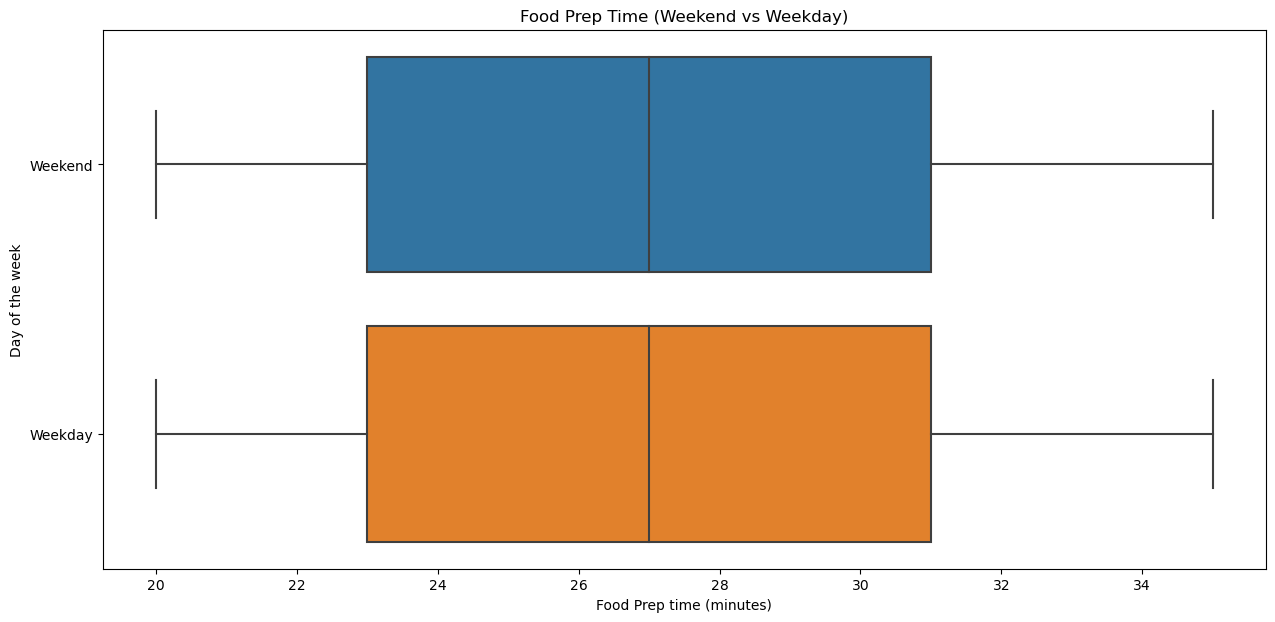

In [77]:
#set the plot size
plt.figure(figsize=(15, 7))

# Create seaborn boxplot to show the food preparation time on weekdays and weekend
box_day = sns.boxplot(data=df,x='food_preparation_time', y='day_of_the_week')#specify axis labels

#set axis labels
box_day.set(ylabel='Day of the week',
       xlabel='Food Prep time (minutes)',
       title='Food Prep Time (Weekend vs Weekday)')


plt.show()


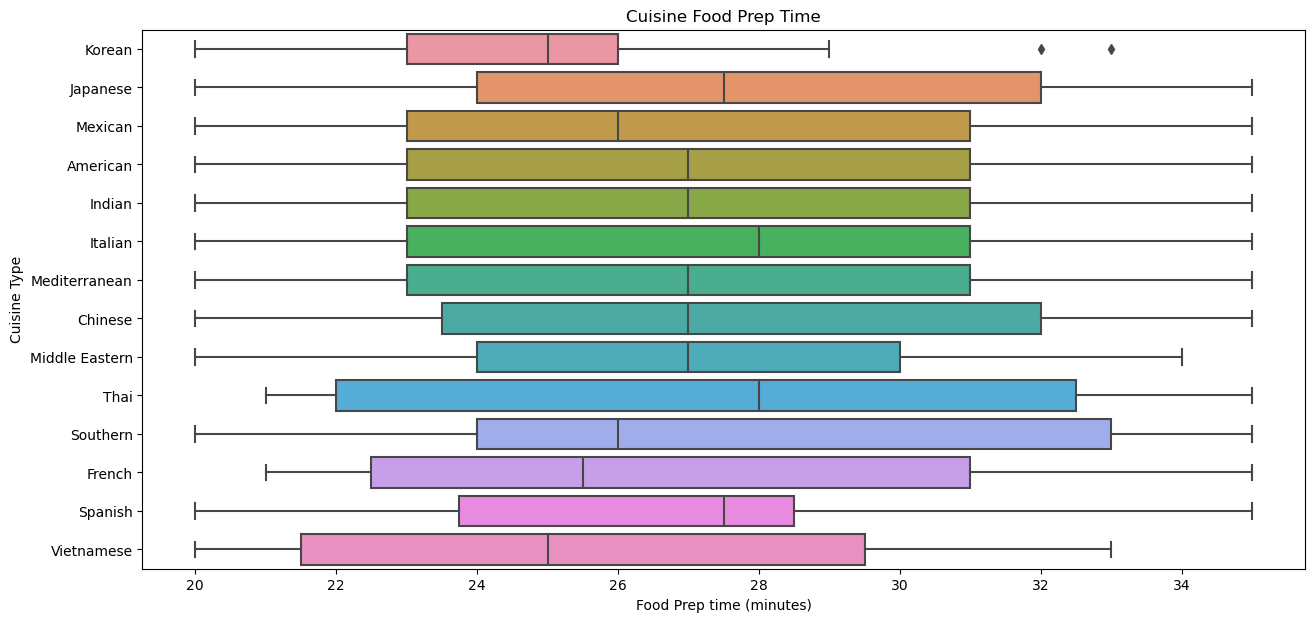

In [78]:
# Set the plot size
plt.figure(figsize=(15, 7))
# Create seaborn boxplot to analyze the food preparation time for each cuisine type
box_cuisine_fp = sns.boxplot(data=df,x='food_preparation_time', y='cuisine_type')

#set axis labels
box_cuisine_fp.set(ylabel='Cuisine Type',
       xlabel='Food Prep time (minutes)',
       title='Cuisine Food Prep Time')

plt.show()


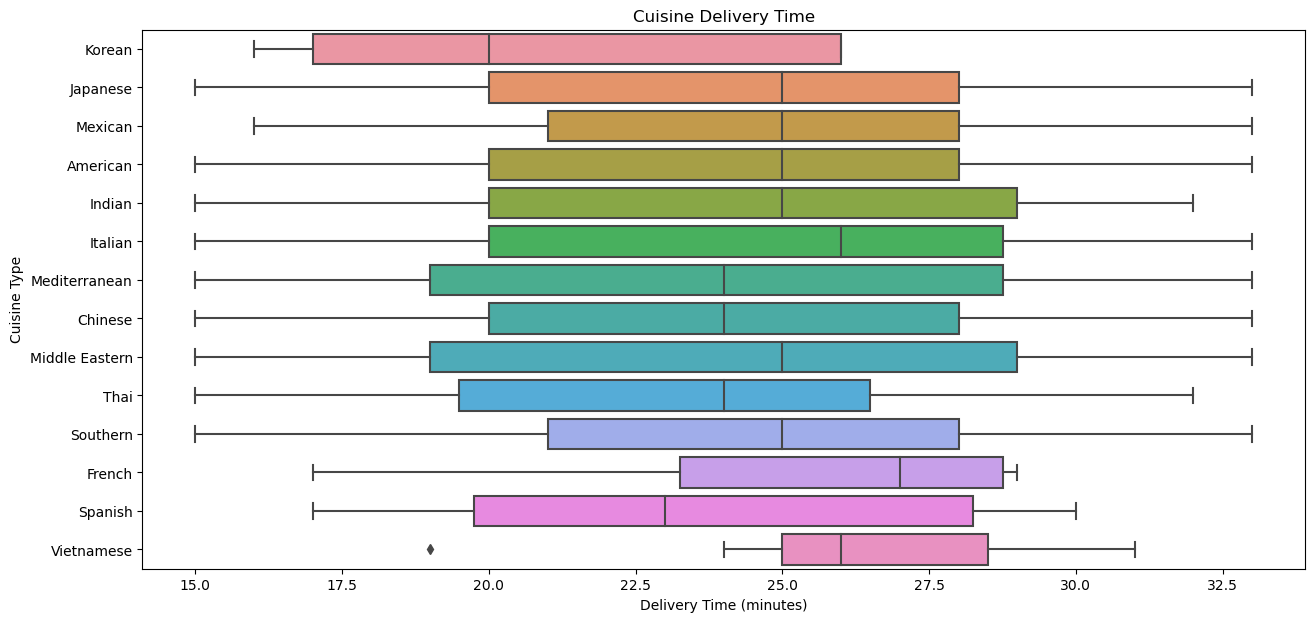

In [92]:
# Set the plot size
plt.figure(figsize=(15, 7))

# Create seaborn boxplot to analyze the food preparation time for each cuisine type
box_cuisine_dt = sns.boxplot(data=df,x='delivery_time', y='cuisine_type')

#set axis labels
box_cuisine_dt.set(ylabel='Cuisine Type',
       xlabel='Delivery Time (minutes)',
       title='Cuisine Delivery Time')


plt.show()

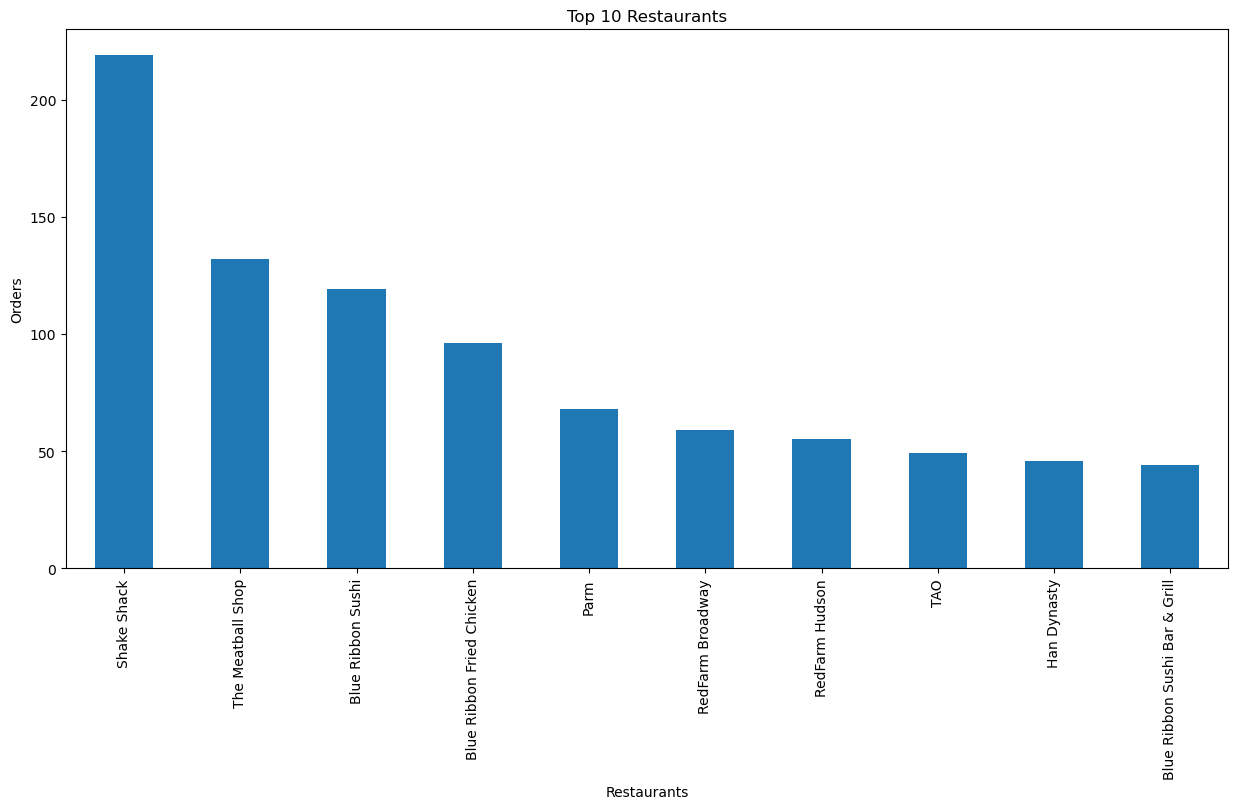

In [80]:
#Show a Pandas bar chart of the top 10 restaurants in the amount of orders.
top_10 = (df['restaurant_name'].value_counts()).iloc[:10]

#create Pandas bar chart to visualize top 10 restaurants by order count
top_10.plot(kind='bar',title='Top 10 Restaurants',xlabel='Restaurants', ylabel='Orders',figsize=(15,7));


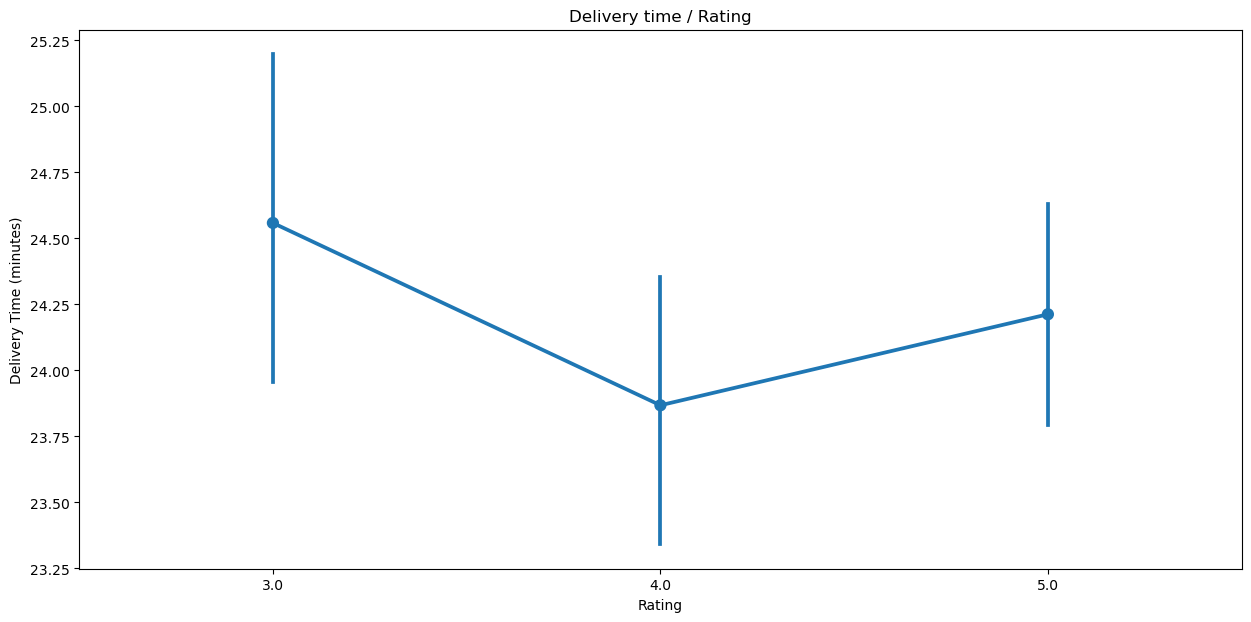

In [97]:
#set the plotsize
plt.figure(figsize=(15, 7))
# Create seaborn pointplot to show delivery time and rating relationship
point_rd = sns.pointplot(x = 'rating', y = 'delivery_time', data = df)

#set axis labels
point_rd.set(ylabel='Delivery Time (minutes)',
       xlabel='Rating',
       title='Delivery time / Rating')

plt.show()


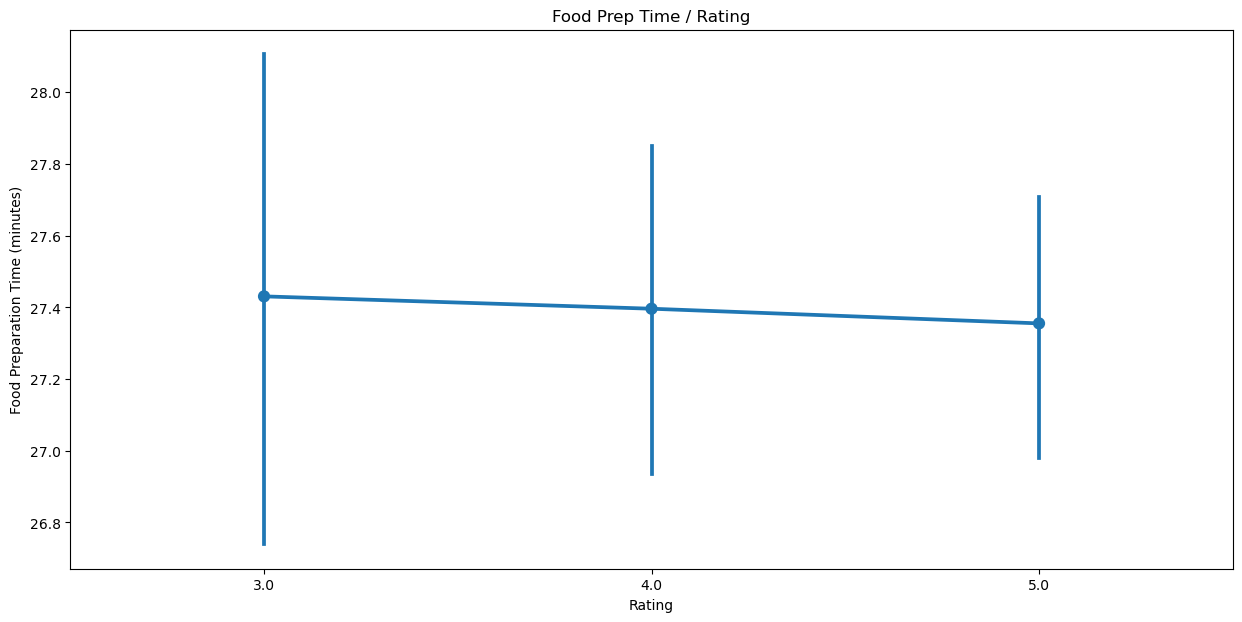

In [96]:
#set the plotsize
plt.figure(figsize=(15, 7))
# Create seaborn pointplot t show relationship between food prep time and rating
point_rd = sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)

#set axis labels
point_rd.set(ylabel='Food Preparation Time (minutes)',
       xlabel='Rating',
       title='Food Prep Time / Rating')

plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [102]:
#Provides a count of the top 5 restaurants by the amount of orders.
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


The top five restaurants are 
1. Shake Shack with 219 orders
2. The Meatball Shop with 132 orders
3. Blue Ribbon Sushi with 119 orders
4. Blue Ribbon Fried Chicken with 96 orders
5. Parm with 68 orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

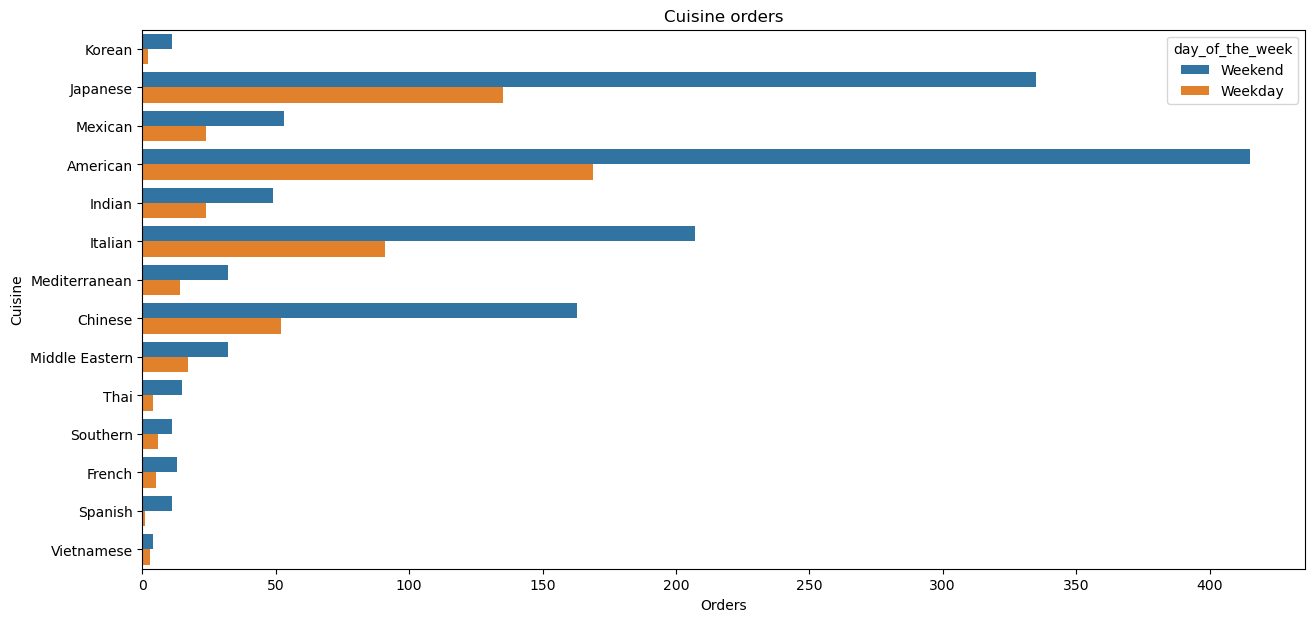

In [101]:
#set the plotsize
plt.figure(figsize=(15, 7))
# Create seaborn pointplot t show relationship between food prep time and rating
count_cd = sns.countplot(data=df,y='cuisine_type', hue="day_of_the_week");


#set axis labels
count_cd.set(ylabel='Cuisine',
       xlabel='Orders',
       title='Cuisine orders');



#### Observations:


* The most popular cuisine on the weekends is American. It's also interesting this is the most popular cuisine on the weekdays.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [105]:
#Create a new column that returns true when the cost of the order is greater than 20 dollars, otherwise returns false 
df['greater_than_twenty'] = np.where(df['cost_of_the_order']>20, True, False)

#provides a percentage of the values in the greater_than_twenty column
df['greater_than_twenty'].value_counts(normalize=True) *100



False    70.758693
True     29.241307
Name: greater_than_twenty, dtype: float64

#### Observations:


* 29.24% of the orders in the data set were greater than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [115]:
# Prints the mean order delivery time rounded to 2 decimal places
print('The mean order delivery time is', round(df['delivery_time'].mean(),2), 'minutes.')

The mean order delivery time is 24.16 minutes.


#### Observations:


* The mean order delivery time in minutes rounded was 24.16.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [123]:
# This code prints out the top 3 customer id's in terms of # of orders
print('The top 3 customer IDs are:') 
df['customer_id'].value_counts().head(3)



The top 3 customer IDs are:


52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


The top 3 customers are:

1. 52832 with 13 orders
2. 47440 with 10 orders
3. 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [138]:
#create a new column that adds delivery time and food prep time to produce total delivery time to see of we can find a relationship between total time and customer satisfaction or other things measures
df['total_delivery_time'] = df['delivery_time'] + df['food_preparation_time']
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,greater_than_twenty,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,True,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,False,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,False,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,True,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,False,49


In [142]:
#Evaluate the american restaurants that with the most orders
df[(df['day_of_the_week'] =='Weekend') & (df['cuisine_type'] == 'American')].value_counts().head()


order_id  customer_id  restaurant_name              cuisine_type  cost_of_the_order  day_of_the_week  rating  food_preparation_time  delivery_time  greater_than_twenty  total_delivery_time
1476547   83095        Bareburger                   American      6.84               Weekend          5.0     22                     24             False                46                     1
1477588   286386       5 Napkin Burger              American      29.05              Weekend          3.0     26                     21             True                 47                     1
1477818   144352       Shake Shack                  American      22.36              Weekend          4.0     27                     27             True                 54                     1
1477820   41746        Schnipper's Quality Kitchen  American      25.22              Weekend          4.0     33                     18             True                 51                     1
1477823   50260        Bareburger  

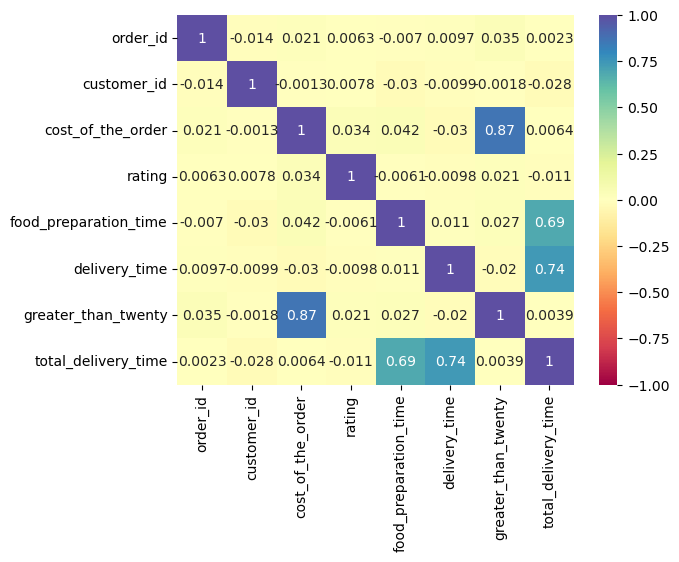

In [145]:
#setup the variables we want to review for correlation
vars = ['order_id', 'customer_id','restaurant_name','cuisine_type','cost_of_the_order','day_of_the_week','rating','food_preparation_time','delivery_time']

#run a correlation of the variables
corr = df[vars].corr(numeric_only=True);

sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Spectral',vmin=-1,vmax=1);


In [148]:

rest1 = df.groupby(["restaurant_name"]).mean(numeric_only=True).sort_values("total_delivery_time", ascending=False).head(10)
rest1

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time,greater_than_twenty,total_delivery_time
restaurant_name,,,,,,,,
Taro Sushi,1478227.0,367591.00,16.0500,5.0,35.0,32.00,0.0,67.00
Cipriani Le Specialita,1478151.0,62941.00,5.9200,5.0,35.0,30.00,0.0,65.00
Il Bambino,1478326.0,82901.00,29.2500,4.0,34.0,29.00,1.0,63.00
Sushi Choshi,1477800.0,344268.00,13.7300,3.0,35.0,27.00,0.0,62.00
Big Wong Restaurant _¤¾Ñ¼,1477895.0,143926.00,5.9200,NaN,34.0,28.00,0.0,62.00
Crema Restaurante,1477494.0,300003.00,15.8600,NaN,31.0,30.00,0.0,61.00
Grand Sichuan International,1477564.5,194136.75,19.5225,5.0,31.0,29.25,0.5,60.25
Mira Sushi,1477448.0,85166.50,12.4200,4.0,32.5,27.50,0.0,60.00
Hot Kitchen,1477058.5,103147.00,21.2700,5.0,33.0,26.50,0.5,59.50


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [151]:
#DOes a group by of the restaurants rating then aggregates the sum, mean and counts so we can do additional analysis
restaurant= df.groupby('restaurant_name')[['rating']].agg(['sum','mean','count'])

#filter down to provide restaurants with an average rating > 4 and a total rating count of > 50
restaurant= restaurant[(restaurant['rating']['mean']>4) & (restaurant['rating']['count']>50)]
restaurant






rating                
                             sum      mean count
restaurant_name                                 
Blue Ribbon Fried Chicken  277.0  4.328125    64
Blue Ribbon Sushi          308.0  4.219178    73
Shake Shack                569.0  4.278195   133
The Meatball Shop          379.0  4.511905    84

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [164]:
# Setup big order revenue dataframe where cost of order > 20 dollars
net_revenue_big_orders = df[df['cost_of_the_order']>20 ]

# Setup big order revenue dataframe where cost of order > 5 dollars but less than 21 dollars
net_revenue_small_orders = df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<21)]

# Calculate net revenue small orders with 15% of the order costs
net_revenue_small_orders = net_revenue_small_orders['cost_of_the_order'] *.15

# Calculate net revenue big orders with 25% of the order costs
net_revenue_big_orders = net_revenue_big_orders['cost_of_the_order'] *.25

print('The net revenue is', round(net_revenue_big_orders.sum() + net_revenue_small_orders.sum(),2))

The net revenue is 6236.45


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [174]:
# Calculate the percentage of the time total delivery was more than 60 minutes 
round(len(df[df['total_delivery_time']>60]) / len(df)*100,2)

print('The total delivery time is greater than 60 minutes', round(len(df[df['total_delivery_time']>60]) / len(df)*100,2), '% of the time.')



The total delivery time is greater than 60 minutes 10.54 % of the time.


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [181]:
# Produce a dataframe that does a group by day of week and sets up a column for deliveyr time
day_of_week_delivery = df.groupby('day_of_the_week')[['delivery_time']]

#Calculate the display the mean delivery time on weekday vs weekend, round to 2
day_of_week_delivery.mean().round(2)


,delivery_time
day_of_the_week,
Weekday,28.34
Weekend,22.47


#### Observations:


* Delivery is taking a much longer on the Weekdays, Mean time to deliver an order on the weekend is 22.47 minutes vs 26.34 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* Delivery is taking a much longer on the Weekdays, Mean time to deliver an order on the weekend is 22.47 minutes vs 26.34 minutes.
* On the weekday there was not a delivery time that as less than 24 minutes wheras on the weekend the minimum was 15 minutes
* Food prep time is very evenly distributed on the weekend vs weekdays, no noticable differences.   
* American cuisine is the most popular for delivery, folowed by Japanese and Italian



### Recommendations:

*  Investigate why delivery takes longer on weekdays, do we lack enough drivers? Might it have to do with traffic issues that cause the increased time?


---